### DISCLAIMER

In [1]:
#source of dataset:
#https://www.kaggle.com/datasets/andrewmvd/pediatric-pneumonia-chest-xray

### IMPORT DATASET

In [2]:
#import and extract dataset from zip format
from zipfile import ZipFile 
  
zip_file = "dataset1.zip"
  
# opening the zip file in READ mode 
with ZipFile(zip_file, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0001-0001.jpeg 2020-03-18 09:12:46       252680
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0003-0001.jpeg 2020-03-18 09:12:46       329189
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0005-0001.jpeg 2020-03-18 09:12:48       408620
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0006-0001.jpeg 2020-03-18 09:12:48       252275
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0007-0001.jpeg 2020-03-18 09:12:50       408508
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0009-0001.jpeg 2020-03-18 09:12:50       312466
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0010-0001.jpeg 2020-03-18 09:12:50       299115
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0011-0001-0001.jpeg 2020-03-18 09:12:52       446983
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0011-0001-0002.jpeg 2020-03-18 09:12:52       422882
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0011-000

### CHECK DATASET

In [40]:
#Check total dataset for train and test
import os

train_dir = 'Pediatric Chest X-ray Pneumonia/train'
test_dir = 'Pediatric Chest X-ray Pneumonia/test'

# Directory with training horse pictures
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
# Directory with training humans pictures
train_normal_dir = os.path.join(train_dir, 'NORMAL')
# Directory with validation horse pictures
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')
# Directory with validation human pictures
test_normal_dir = os.path.join(test_dir, 'NORMAL')

print(f"There are {len(os.listdir(train_pneumonia_dir))} images of pneumonia for training.\n")
print(f"There are {len(os.listdir(test_pneumonia_dir))} images of pneumonia for test.\n")
print(f"There are {len(os.listdir(train_normal_dir))} images of pneumonia for training.\n")
print(f"There are {len(os.listdir(test_normal_dir))} images of pneumonia for test.\n")

There are 3883 images of pneumonia for training.

There are 390 images of pneumonia for test.

There are 1349 images of pneumonia for training.

There are 234 images of pneumonia for test.



Sample pneumonia lung image:


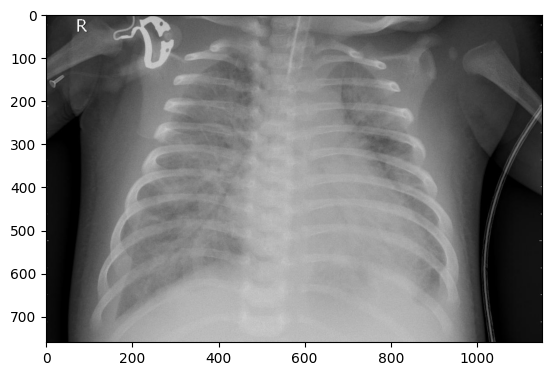


Sample normal lung image:


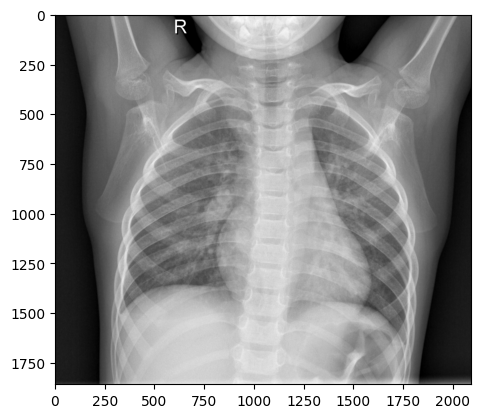

In [41]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

print("Sample pneumonia lung image:")
plt.imshow(load_img(f"{os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[0])}"))
plt.show()

print("\nSample normal lung image:")
plt.imshow(load_img(f"{os.path.join(train_normal_dir, os.listdir(train_normal_dir)[0])}"))
plt.show()

In [42]:
#Check Image Shape

# load one sample image
sample_image1  = load_img(f"{os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[0])}")
sample_image2  = load_img(f"{os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[1])}")
sample_image3  = load_img(f"{os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[2])}")

# Check image shape
sample_array = [img_to_array(sample_image1), img_to_array(sample_image2), img_to_array(sample_image3)]

for i in range(0,3):
    print(f"Each image {i} has shape: {sample_array[i].shape}")

Each image 0 has shape: (760, 1152, 3)
Each image 1 has shape: (768, 1072, 3)
Each image 2 has shape: (863, 1244, 3)


this shows that images have different shape, we have to preprocess it first

### IMAGE AUGMENTATION

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [44]:
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [45]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (128,128)
)

test_generator = test_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (128,128)
)

Found 5232 images belonging to 2 classes.
Found 5232 images belonging to 2 classes.


In [52]:
import tensorflow as tf

model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (128,128,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=128, activation='relu'),
      tf.keras.layers.Dense(units=1, activation='sigmoid'),

  ])

In [53]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [54]:
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=test_generator)

Epoch 1/15


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


262/262 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.7411 - loss: 0.6058 - val_accuracy: 0.7846 - val_loss: 0.4869
Epoch 2/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 198s 748ms/step - accuracy: 0.8214 - loss: 0.3836 - val_accuracy: 0.8373 - val_loss: 0.3626
Epoch 3/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 202s 759ms/step - accuracy: 0.8488 - loss: 0.3475 - val_accuracy: 0.8740 - val_loss: 0.3186
Epoch 4/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 191s 718ms/step - accuracy: 0.8621 - loss: 0.3174 - val_accuracy: 0.8740 - val_loss: 0.2999
Epoch 5/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 168s 634ms/step - accuracy: 0.8744 - loss: 0.2925 - val_accuracy: 0.8912 - val_loss: 0.2529
Epoch 6/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 113s 427ms/step - accuracy: 0.8849 - loss: 0.2717 - val_accuracy: 0.8702 - val_loss: 0.2811
Epoch 7/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 110s 415ms/step - accuracy: 0.8879 - loss: 0.2791 - val_accuracy: 0.9205 - val_loss: 0.2048
Epoch 8/15
245/262 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - accuracy: 0.8984 - loss: 0.2423

KeyboardInterrupt: 